In [1]:
import matplotlib.pyplot as plt
import json
from linear_algebra import distance
from collections import Counter
import numpy
from descartes import PolygonPatch

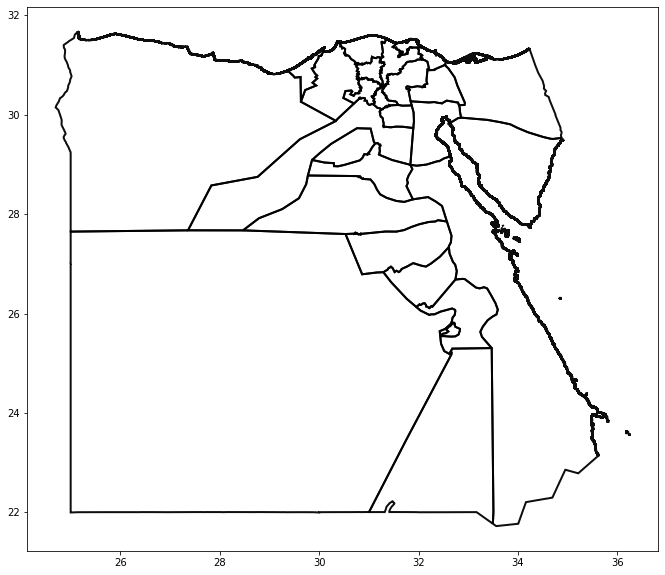

In [5]:
geojson = {}
with open("gadm36_EGY_1.json") as map:
    geojson = json.load(map)
    
figure = plt.figure(figsize=(30,10)) 

plot = figure.gca() 
for poly in geojson['geometries']:
    plot.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
    plot.axis('scaled')
plt.show()

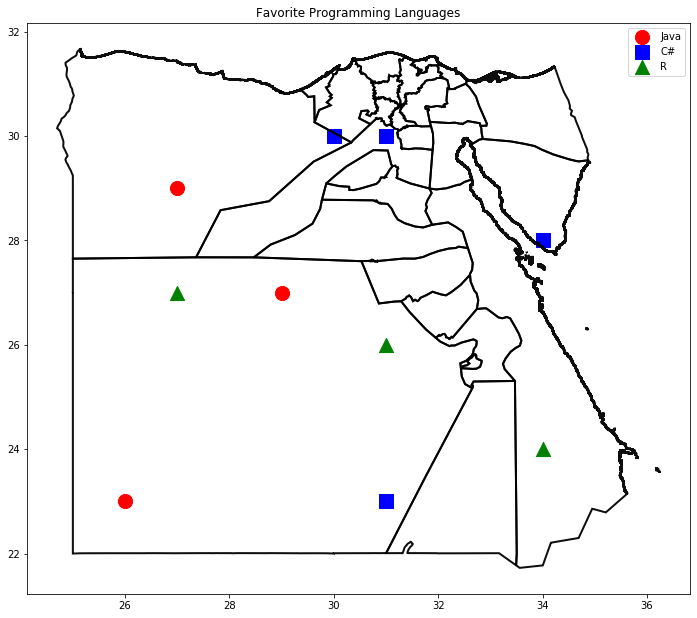

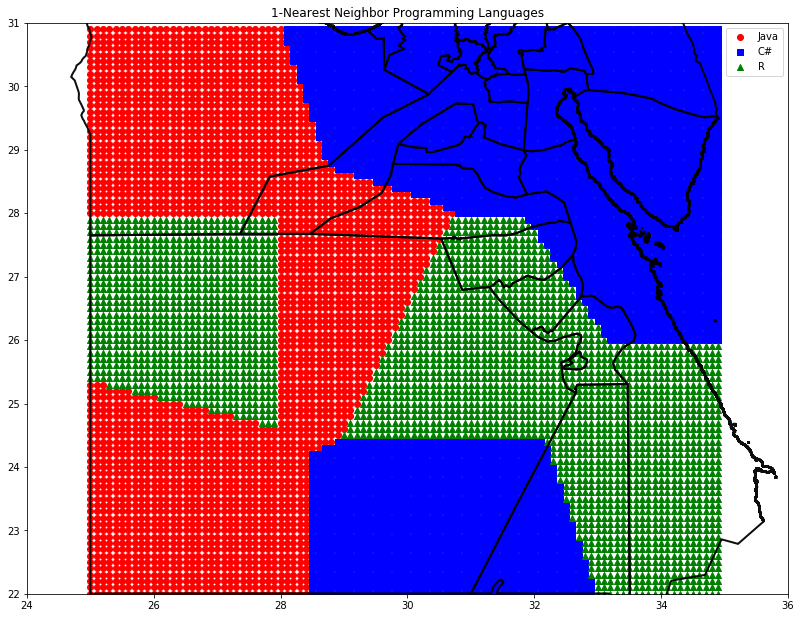

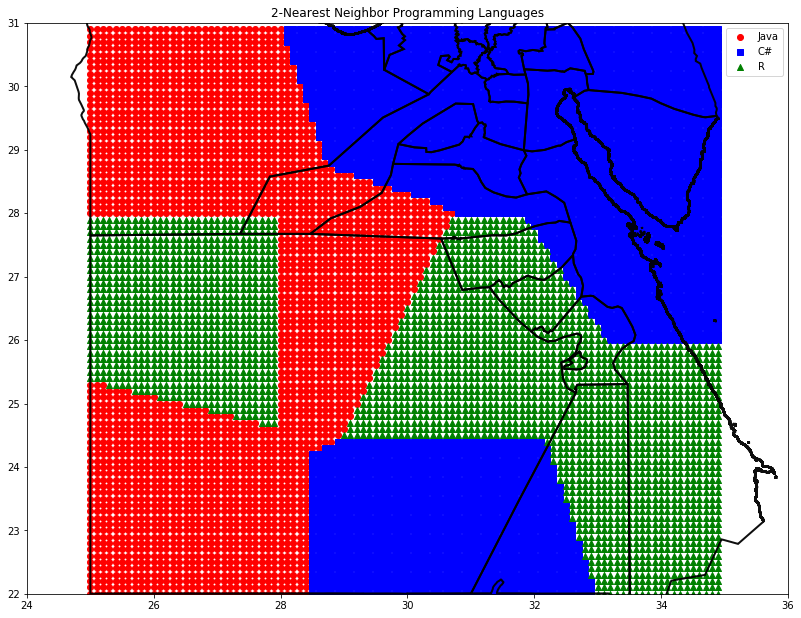

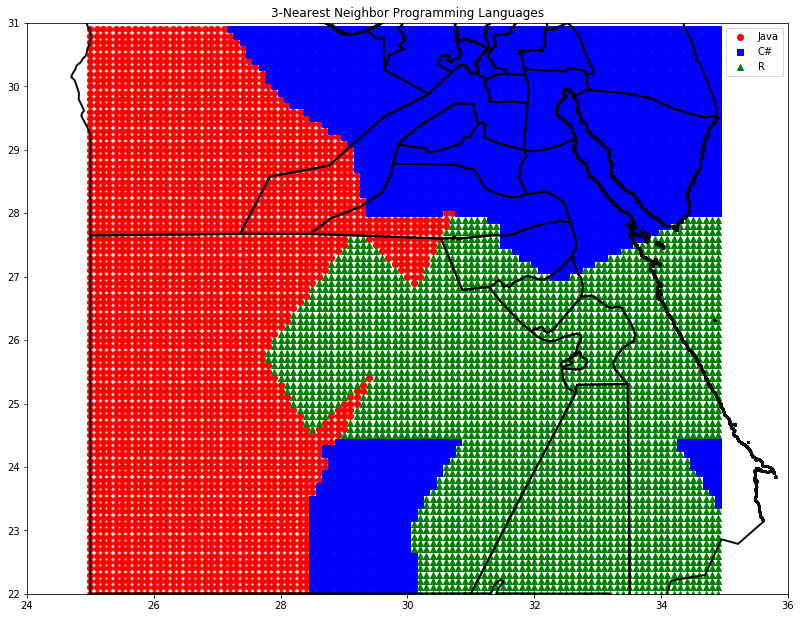

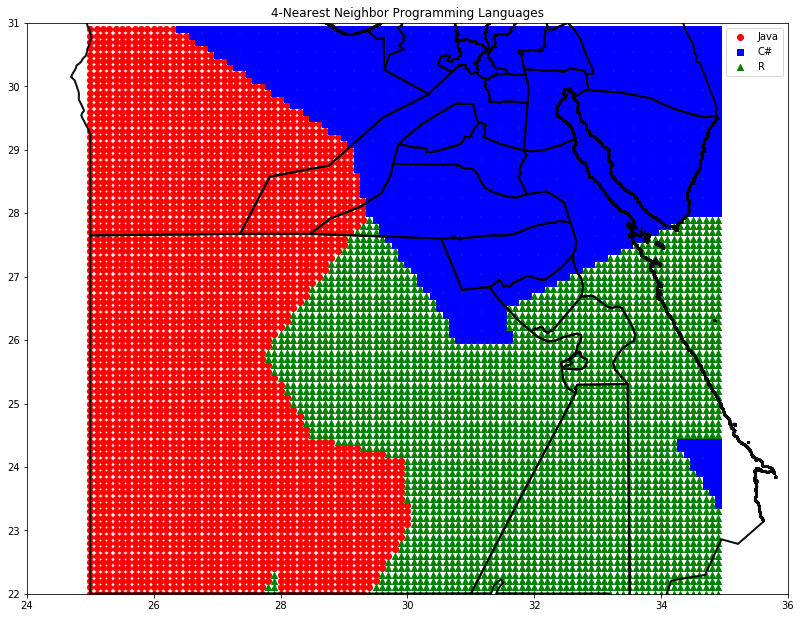

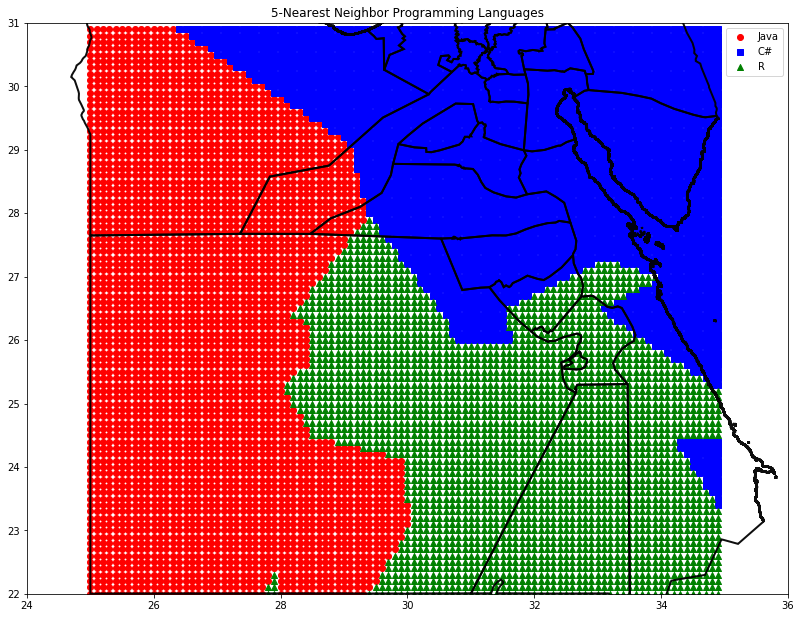

In [8]:
cities = [(30,30,'C#'),
          (34,28,'C#'),
          (27,29,'Java'),
          (29,27,'Java'),
          (31,26,'R'),
          (34,24,'R'),
          (31,23,'C#'),
          (26,23,'Java'),
          (27,27,'R'),
          (31,30,'C#')]

     
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)


def plot_state_borders(plt, color='0.8'):
    geojson = {}
    with open("gadm36_EGY_1.json", "r") as map:
        geojson = json.load(map)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax = plt.gca() 
    for poly in geojson['geometries']:
        ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
        ax.axis('scaled')

def plot_cities():

    plots = { "Java" : ([], []), "C#" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "C#" : "s", "R" : "^" }
    colors  = { "Java" : "r", "C#" : "b", "R" : "g" }


    plot_state_borders(plt)    
    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10, s=200)

    plt.legend(loc=0)
    plt.title("Favorite Programming Languages")
    plt.show()

def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "C#" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "C#" : "s", "R" : "^" }
    colors  = { "Java" : "r", "C#" : "b", "R" : "g" }


    for longitude in numpy.arange(25, 35, 0.1):
        for latitude in numpy.arange(22, 31, 0.1):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black') 

    plt.legend(loc=0)          
    plt.axis([24,36,22,31])
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

plot_cities()
classify_and_plot_grid(1)
classify_and_plot_grid(2)
classify_and_plot_grid(3)
classify_and_plot_grid(4)
classify_and_plot_grid(5)